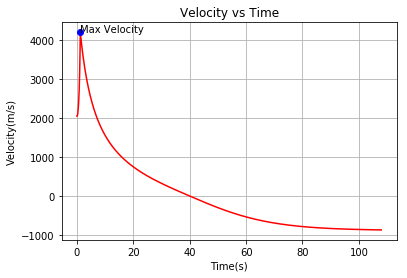

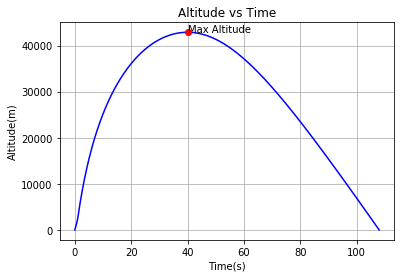

The maximum Velocity reached is  4203.29 m/s
The maximum Altitude reached is  42887.35 m
The time taken to achieve terminal velocity was  107.95 s


In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import math
#masses obtained from jupyter ex3
#seed = 2319804890
Mr = 4116 #Mass of Rocket without Fuel
Mf = 8909 #Mass of Fuel
Mt = 13025 #Total Mass of Rocket with Fuel
#Define Parameters 
g = 9.81
fuel_rate = 124.9
P = 1.22
C = 0.125
#area calculation
D = 1.65
r = D/2
A = math.pi * r*r
Ve = 2050
#We need to use Euler numerical Integration to solve, considering two stages
#Stage1 = Ascending while it has fuel with its total mass M reducing with time
#Stage2 = Descending once all of its fuel has been burnt and its mass is constant

#defining lists and initial parameters
dt = 0.01
h = 0
V = 2050
t = 0.0
tt = [t]
hh = [h]
vv = [V]
Mtot = Mf + Mr
dm = 0

#stage 1 while loop
while Mf >= 0: #while the rocket has fuel
    
    dm = fuel_rate * t #change in mass
    Fdrag = 0.5 * P * C * A * V**2 #drag force calculation
    Fgravity = 9.8 * Mtot #gravity calculation
    Fthrust = (2050) * (dm/dt) #thrust force calculation
    Net_Force = Fthrust - Fdrag - Fgravity #calculating net force 
    acceleration = (Net_Force / Mt) #converting net force to net acceleration
    V = V + acceleration * dt #updating v by acceleration
    h = h + V * dt #updating height based off of velocity
    Mt = Mt - dm #decreasing the total mass of the rocket
    Mf = Mf - dm #decreasing the mass of fuel left for the while loop checker
    t = t + dt #itterating time
    #appending lists
    tt.append(t)
    hh.append(h)
    vv.append(V)
sign = 1
while h >= 0: #while the rocket has not crashed 
    #if statement to ensure drag force is against the motion of the rocket
    if V < 0:
        sign = -1
    Fdrag = sign * 0.5 * P * C * A * V**2 #calculating drag force
    Fgravity = 9.8 * Mtot #calculating gravity
    Net_Force = 0 -Fdrag- Fgravity #net force calculation
    acceleration = (Net_Force / Mt) #converting net force to net acceleration
    V = V + acceleration * dt #updating velocity based on acceleration
    h = h + V * dt #updating height based on velocity
    t = t + dt #iterrating time
    #appending lists
    tt.append(t)
    hh.append(h)
    vv.append(V)
#calculating the max height and its respective time    
max_h = max(hh)
max_h_index = hh.index(max_h)
max_h_t = tt[max_h_index]
#calculating max velocity and its respective time
max_v = max(vv)
max_v_index = vv.index(max_v)
max_v_t = tt[max_v_index]
#first plot, velocity v time
plt.plot(tt, vv, 'r')
plt.title("Velocity vs Time")
plt.xlabel('Time(s)')
plt.ylabel('Velocity(m/s)')
plt.plot(max_v_t, max_v, 'bo')
plt.annotate("Max Velocity", (max_v_t, max_v))
plt.grid()
plt.show()
#second plot, height v time
plt.plot(tt, hh, 'b')
plt.plot(max_h_t, max_h, 'ro')
plt.title("Altitude vs Time")
plt.xlabel('Time(s)')
plt.ylabel('Altitude(m)')
plt.annotate("Max Altitude", (max_h_t, max_h))
plt.grid()
plt.show()
#print statements for the scientist
print("The maximum Velocity reached is ",round(max_v,2), "m/s")
print("The maximum Altitude reached is ",round(max_h,2), 'm')
print("The time taken to achieve terminal velocity was ",round(tt[-2],2), 's')
